In [4]:
with open('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/NLS_Group01.txt', 'r') as f:
    lines = f.readlines()
class1_examples = lines[:300]
class2_examples = lines[300:800]
class3_examples = lines[800:]
with open('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class1.txt', 'w') as f:
    f.writelines(class1_examples)

with open('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class2.txt', 'w') as f:
    f.writelines(class2_examples)

with open('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class3.txt', 'w') as f:
    f.writelines(class3_examples)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as ml
from math import sqrt

def plot(covMat, classname):
	minMax = np.zeros((numFeature,2))
	colors = ['#136906', '#fcbdfc', '#e5ff00', '#ff0000', '#3700ff', '#000000']

	# Resolution affects the time required to process.
	res = 1000

	count = 0
	for i in range(nClass):
		for j in range(numFeature):
			if count == 0:
				minMax[j, 0] = np.ceil(np.amin(mainList[i][:, j]))
				minMax[j, 1] = np.ceil(np.amax(mainList[i][:, j]))
			else:
				minMax[j, 0] = min(minMax[j,0], np.ceil(np.amin(mainList[i][:, j])))
				minMax[j, 1] = max(minMax[j,1], np.ceil(np.amax(mainList[i][:, j])))
			count = 1

	dataRange = np.zeros((numFeature))
	for i in range(numFeature):
		dataRange[i] = 0.1*(minMax[i, 1] - minMax[i, 0])

	x = np.linspace(minMax[0, 0] - dataRange[0], minMax[0, 1] + dataRange[0], res)
	y = np.linspace(minMax[1,0] - dataRange[1], minMax[1,1] + dataRange[1], res)

	tellClassNum = np.zeros((np.size(x,0)*np.size(y,0), nClass))

	count = 0
	for j in y:
		for i in x:
			for k in range(nClass):
				dataPt = np.array([i,j])
				tellClassNum[count, k] = discriminant(dataPt, meanVector[k], covMat[k])
			count += 1

	lenX = np.size(x,0)
	Z = np.zeros((nClass, lenX, lenX))

	for k in range(nClass):
		count = 0
		for j in y:
			for i in x:
				dataPt = np.array([i,j])
				fi = int(count/lenX)
				sec = count%lenX
				Z[k, fi, sec] = gaussianDensity(dataPt, meanVector[k], covMat[k])
				count += 1

	count = 0
	for idx in range(nClass+1):
		fig1 = plt.figure(1)
		ax = fig1.gca()

		plotClass = []
		for cl in range(nClass):
			temp1 = []
			for fe in range(numFeature):
				temp1.append([])
			plotClass.append(temp1)

		class_colours = []
		classes = []
		count = 0
		for j in y:
			for i in x:
				tempArr = np.argsort(tellClassNum[count, :])
				count += 1
				classNum = tempArr[-2] if tempArr[-1] == idx else tempArr[-1]
				plotClass[classNum][0].append(i)
				plotClass[classNum][1].append(j)

		plotname = "/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/plot.png"

		if idx==0:
			ax.plot(plotClass[1][0], plotClass[1][1], c=colors[1],marker=".",  linestyle="None", label="Class 2 Prediction")
			ax.plot(plotClass[2][0], plotClass[2][1], c=colors[2],marker=".",  linestyle="None", label="Class 3 Prediction")
			ax.plot(mainList[1][:,0], mainList[1][:,1], c=colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
			ax.plot(mainList[2][:,0], mainList[2][:,1], c=colors[5], marker=".",  linestyle="None", label="Class 3 Data", ms='2')
			class_colours = [colors[4], colors[5], colors[1], colors[2]]
			classes = ["Class 2 Data", "Class 3 Data", "Class 2 Prediction", "Class 3 Prediction"]
			plotname = "23"+plotname
		elif idx==1:
			ax.plot(plotClass[0][0], plotClass[0][1], c=colors[0],marker=".", linestyle="None", label="Class 1 Prediction")
			ax.plot(plotClass[2][0], plotClass[2][1], c=colors[2],marker=".", linestyle="None", label="Class 3 Prediction")
			ax.plot(mainList[0][:,0], mainList[0][:, 1], c=colors[3], marker=".", linestyle="None", label="Class 1 Data", ms='2')
			ax.plot(mainList[2][:,0],mainList[2][:,1], c=colors[5], marker=".", linestyle="None", label="Class 3 Data", ms='2')
			class_colours = [colors[5], colors[3], colors[0], colors[2]]
			classes = ["Class 1 Data", "Class 3 Data", "Class 1 Prediction", "Class 3 Prediction"]
			plotname = "13" + plotname
		elif idx==2:
			ax.plot(plotClass[0][0], plotClass[0][1], c = colors[0],marker=".",  linestyle="None", label="Class 1 Prediction")
			ax.plot(plotClass[1][0], plotClass[1][1], c = colors[1],marker=".",  linestyle="None", label="Class 2 Prediction")
			ax.plot(mainList[0][:,0],mainList[0][:,1], c=colors[3], marker=".",  linestyle="None", label="Class 1 Data", ms='2')
			ax.plot(mainList[1][:,0],mainList[1][:,1], c = colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
			class_colours = [colors[3], colors[4], colors[0], colors[1]]
			classes = ["Class 1 Data", "Class 2 Data", "Class 1 Prediction", "Class 2 Prediction"]
			plotname = "12" + plotname
		else:
			ax.plot(plotClass[0][0], plotClass[0][1], c = colors[0],marker=".",  linestyle="None", label="Class 1 Prediction")
			ax.plot(plotClass[1][0], plotClass[1][1], c = colors[1],marker=".",  linestyle="None", label="Class 2 Prediction")
			ax.plot(plotClass[2][0], plotClass[2][1], c=colors[2],marker=".",  linestyle="None", label="Class 3 Prediction")
			ax.plot(mainList[0][:,0],mainList[0][:,1], c = colors[3], marker=".",  linestyle="None", label="Class 1 Data", ms='2')
			ax.plot(mainList[1][:,0],mainList[1][:,1], c = colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
			ax.plot(mainList[2][:,0],mainList[2][:,1], c = colors[5], marker=".",  linestyle="None", label="Class 3 Data", ms='2')
			class_colours = [colors[3], colors[4], colors[5], colors[0], colors[1], colors[2]]
			classes = ["Class 1 Data", "Class 2 Data", "Class 3 Data", "Class 1 Prediction", "Class 2 Prediction", "Class 3 Prediction"]
			plotname = "123" + plotname
		ax.patch.set_visible(False)
		if idx == 0:
			plt.title("Class 2 vs Class 3")
		elif idx == 1:
			plt.title("Class 1 vs Class 3")
		elif idx == 2:
			plt.title("Class 1 vs Class 2")
		else:
			plt.title("Class 1 - Class 2 - Class 3")
		plotname = classname + plotname
		plt.xlabel('X')
		plt.ylabel('Y')
		recs = []
		for i in range(0,len(class_colours)):
			recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
		plt.legend(recs, classes, loc='upper right')
		plt.savefig(plotname)
		plt.show()
		if idx == 3:
			fig2 = plt.figure(2)
			bx = fig2.gca()

			X,Y = np.meshgrid(x,y)

			bx.plot(mainList[0][:,0],mainList[0][:,1], c = colors[3], marker=".",  linestyle="None", label="Class 1 Data", ms='2')
			bx.plot(mainList[1][:,0],mainList[1][:,1], c = colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
			bx.plot(mainList[2][:,0],mainList[2][:,1], c = colors[5], marker=".",  linestyle="None", label="Class 3 Data", ms='2')
			class_colours = [colors[3], colors[4], colors[5], colors[0], "#824003", "#cc00ff"]
			classes = ["Class 1 Data", "Class 2 Data", "Class 3 Data", "Class 1 Contours", "Class 2 Contours", "Class 3 Contours"]

			bx.contour(X, Y, Z[0], alpha=1, linewidth=10, colors=colors[0], label="Class 1 Contour")
			bx.contour(X, Y, Z[1], alpha=1, linewidth=10, colors="#824003", label="Class 2 Contour")
			bx.contour(X, Y, Z[2], alpha=1, linewidth=10, colors="#cc00ff", label="Class 3 Contour")

			recs = []
			for i in range(0, len(class_colours)):
				recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=class_colours[i]))
			plotname = classname+"_contours.png"

			plt.legend(recs, classes, loc='upper right')
			plt.title("Contours with training data")
			plt.xlabel('X')
			plt.ylabel('Y')
			plt.savefig(plotname)
			plt.show()

def gaussianDensity(dataPt, mean, covariance):

	dataPt = dataPt.reshape(numFeature,1)
	deviation = dataPt - mean
	tempTerm = np.matmul(np.transpose(deviation), np.linalg.inv(covariance))
	tempTerm = np.matmul(tempTerm, deviation)
	tempTerm = -0.5*tempTerm
	tempTerm = np.exp(tempTerm)
	deter = np.linalg.det(covariance)
	total = (deter**(-1./2))*(tempTerm)
	total = ((2*np.pi)**(numFeature/2.))*total
	return total

In [10]:
#defining discriminant function
def discriminant(dataPt, mean, covariance):
	covInv = np.linalg.inv(covariance)
	dataTranp = np.transpose(dataPt)
	meanTranp = np.transpose(mean)

	W_i = np.multiply(covInv, -0.5)
	w_i = np.matmul(covInv, mean)
	bias_i = np.matmul(meanTranp,covInv)
	bias_i = np.matmul(bias_i,mean)
	bias_i += np.log(np.linalg.det(covariance))
	bias_i = np.multiply(bias_i, -0.5)
	Wtot_i = np.matmul(dataTranp,W_i)
	Wtot_i = np.matmul(Wtot_i,dataPt)
	w_i = np.transpose(w_i);
	w_i = np.matmul(w_i,dataPt)
	total = Wtot_i + w_i + bias_i
	return total

nClass = 3

def fileHandle(fileName):
	file = open(fileName)
	tempList = []

	for line in file:
		teLine = line.rstrip('\n ').split(' ')
		nLine = [float(i) for i in teLine]
		tempList.append(teLine)

	file.close()
	x = np.array(tempList,float)
	return x



mainList = []

mainList.append(fileHandle("/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class1.txt"))
mainList.append(fileHandle("/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class2.txt"))
mainList.append(fileHandle("/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class3.txt"))

numSample = np.zeros((nClass))
numFeature = len(mainList[0][0])

train_fraction = 0.7
test_fraction = 0.3

trainList = []
testList = []

for i in range(nClass):
    num_samples = len(mainList[i])
    num_train = int(train_fraction * num_samples)
    trainList.append(mainList[i][:num_train])
    testList.append(mainList[i][num_train:])

#meanVectors
#Can also use in-built function of numpy -- numpy.mean

meanVector = np.zeros((nClass, numFeature, 1))
for i in range(nClass):
	data = np.copy(mainList[i])
	meanVector[i] = (np.sum(data,axis=0)).reshape((numFeature,1))
	meanVector[i] /= numSample[i]

# Covariance matrix
# can use inbuilt cov func too

covMatrix = np.zeros((nClass,numFeature,numFeature))
for i in range(nClass):
	extData = np.copy(mainList[i])
	for j in range(numFeature):
		extData[:, j] = np.subtract(extData[:, j], meanVector[i, j, 0])
	covMatrix[i] = np.matmul(np.transpose(extData), extData)
	covMatrix[i] /= (numSample[i]-1)

<ipython-input-10-23ec1c39ec15>:65: RuntimeWarning: divide by zero encountered in divide
  meanVector[i] /= numSample[i]


In [ ]:
#Classifier - 1
covMatrixCfier1 = np.zeros((numFeature, numFeature))

for i in range(nClass):
	for j in range(numFeature):
		for k in range(numFeature):
			if j!=k:
				covMatrixCfier1[j, k] = 0
			else:
				covMatrixCfier1[j, k] += covMatrix[i, j, k]

covMatrixCfier1 /= nClass

avgDiag = 0

for j in range(numFeature):
	for k in range(numFeature):
		if j==k:
			avgDiag += covMatrixCfier1[j, k]

avgDiag /= numFeature

for i in range(numFeature):
	for j in range(numFeature):
		if i==j:
			covMatrixCfier1[i,j] = avgDiag

temp = np.copy(covMatrixCfier1)
covMatrixCfier1 = np.copy(covMatrix)

for i in range(nClass):
	covMatrixCfier1[i] = temp
##end of Classifier - 1

#Classifier - 2
covMatrixCfier2 = np.zeros((numFeature, numFeature))

for i in range(nClass):
	for j in range(numFeature):
		for k in range(numFeature):
			covMatrixCfier2[j, k] += covMatrix[i, j, k]

covMatrixCfier2 /= nClass

temp = np.copy(covMatrixCfier2)
covMatrixCfier2 = np.copy(covMatrix)

for i in range(nClass):
	covMatrixCfier2[i] = temp

## end classifier-2

#Classifier - 3
covMatrixCfier3 = np.copy(covMatrix)

for i in range(nClass):
	for j in range(numFeature):
		for k in range(numFeature):
			if j!=k:
				covMatrixCfier3[i, j, k] = 0

##end of classifier - 3

#for classifier - 4, use original matrix covMatrix


testSample = np.zeros((nClass))

for i in range(nClass):
	testSample[i] = len(testList[i])

#classifier - 1
predictClassClf1 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrixCfier1[k])
		predictClassClf1[i][np.argmax(discValue)] += 1

#end -- classifier - 1

#classifier - 2
predictClassClf2 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrixCfier2[k])
		predictClassClf2[i][np.argmax(discValue)] += 1

#end -- classifier - - 2

#classifier - 3
predictClassClf3 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrixCfier3[k])
		predictClassClf3[i][np.argmax(discValue)] += 1
#end Classifier-3

#classifier - 4
predictClassClf4 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrix[k])
		predictClassClf4[i][np.argmax(discValue)] += 1

#end -- Classifier - 4
plot(covMatrixCfier1, "class1_")
plot(covMatrixCfier2, "class2_")
plot(covMatrixCfier3, "class3_")
plot(covMatrix, "class4_")


<ipython-input-6-23ec1c39ec15>:8: RuntimeWarning: invalid value encountered in matmul
  w_i = np.matmul(covInv, mean)
<ipython-input-6-23ec1c39ec15>:9: RuntimeWarning: invalid value encountered in matmul
  bias_i = np.matmul(meanTranp,covInv)
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
<ipython-input-5-bb34fb18f7da>:164: RuntimeWarning: invalid value encountered in matmul
  tempTerm = np.matmul(np.transpose(deviation), np.linalg.inv(covariance))


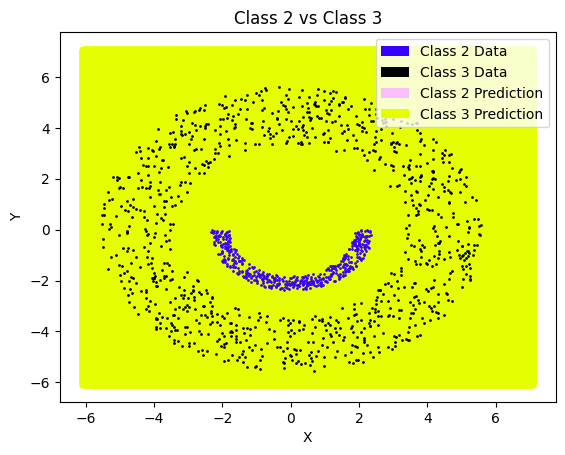

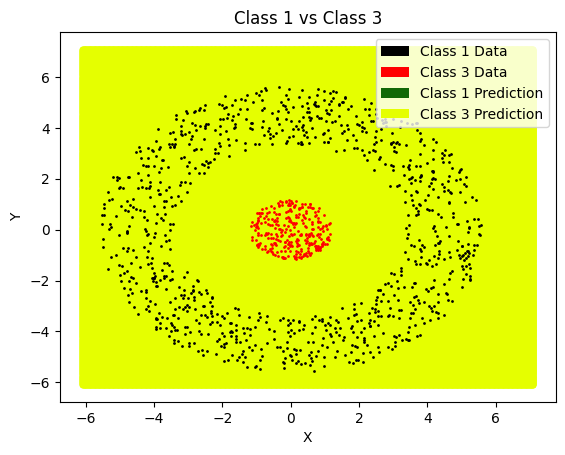

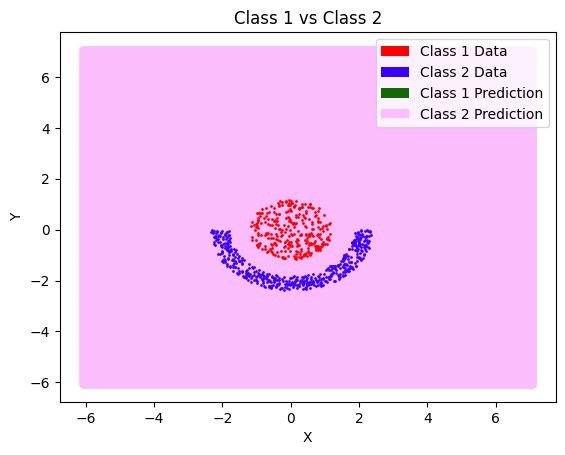

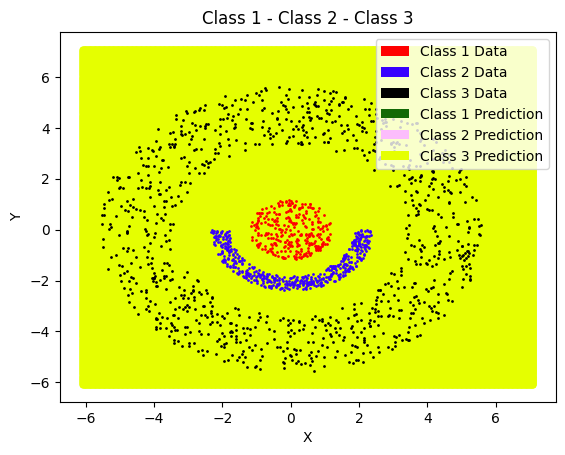

/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-5-bb34fb18f7da>:144: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  bx.contour(X, Y, Z[0], alpha=1, linewidth=10, colors=colors[0], label="Class 1 Contour")
<ipython-input-5-bb34fb18f7da>:145: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  bx.contour(X, Y, Z[1], alpha=1, linewidth=10, colors="#824003", label="Class 2 Contour")
<ipython-input-5-bb34fb18f7da>:146: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  bx.contour(X, Y, Z[2], alpha=1, linewidth=10, colors="#cc00ff", label="Class 3 Contour")


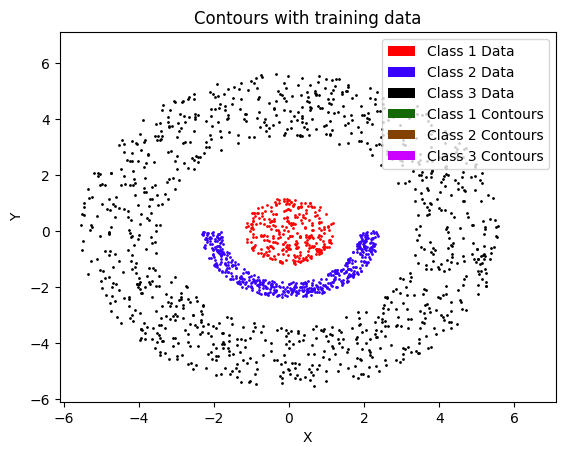

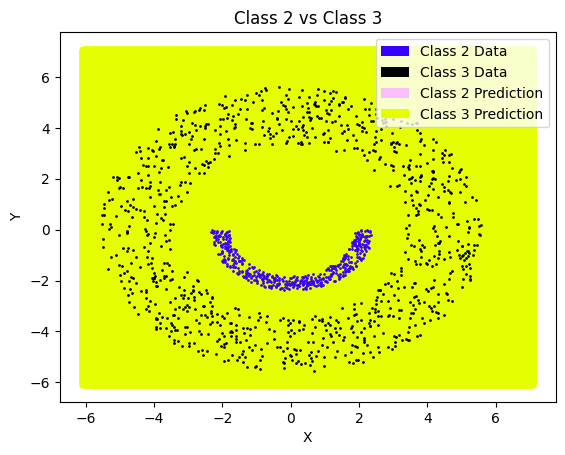

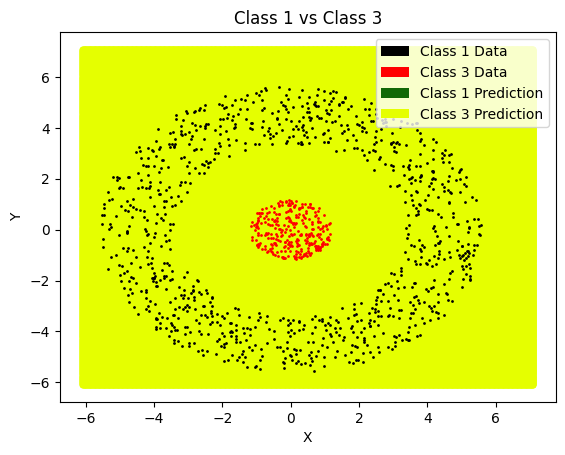

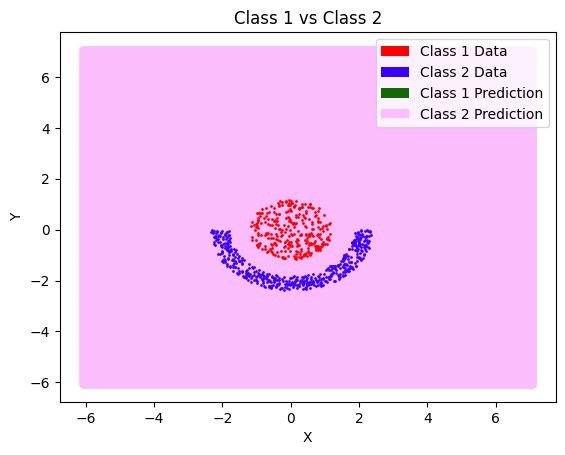

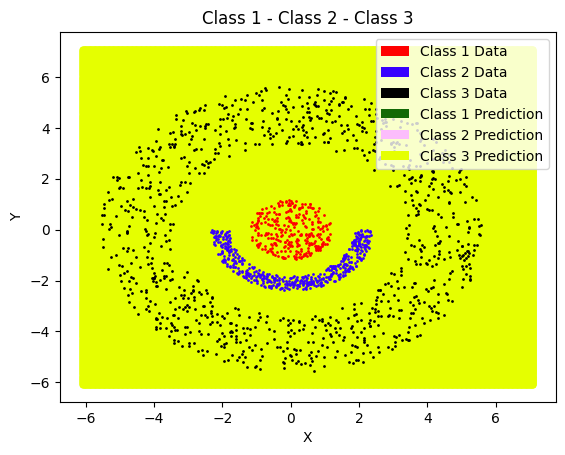

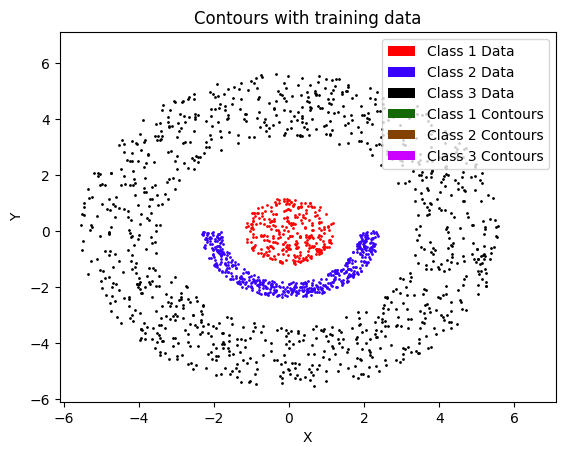

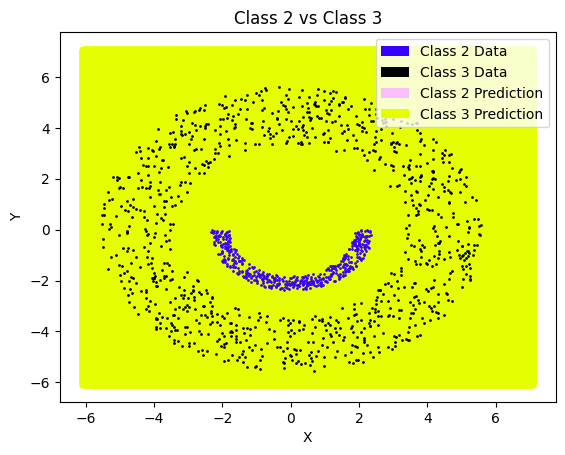

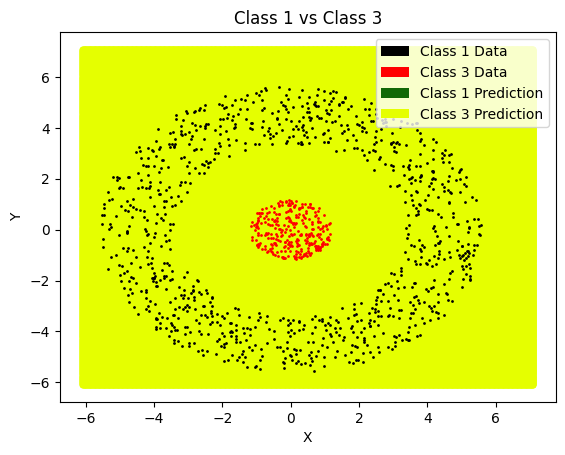

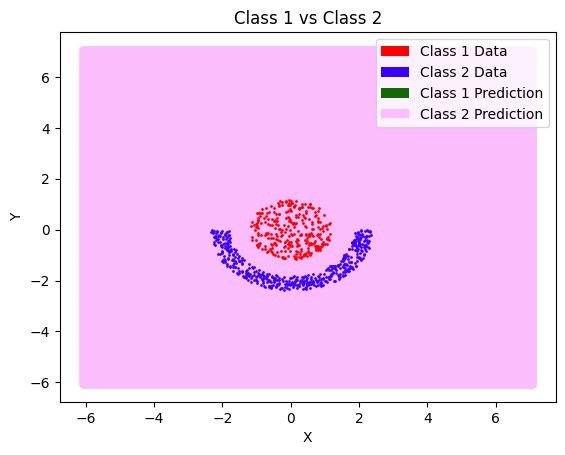

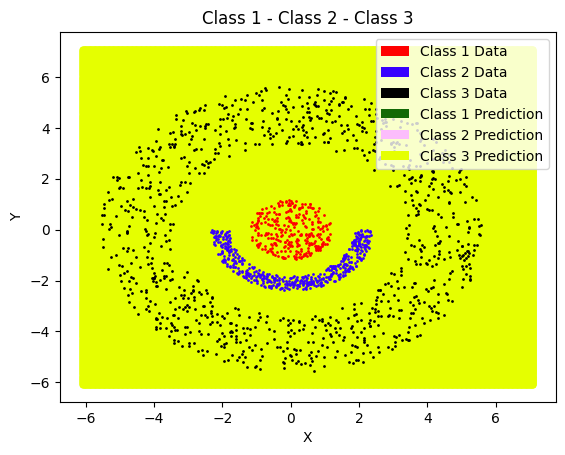

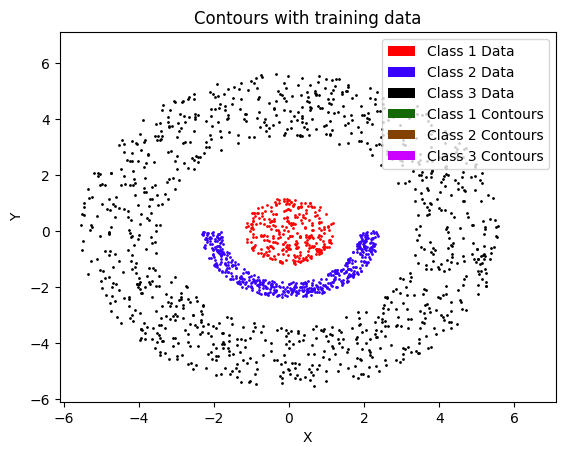

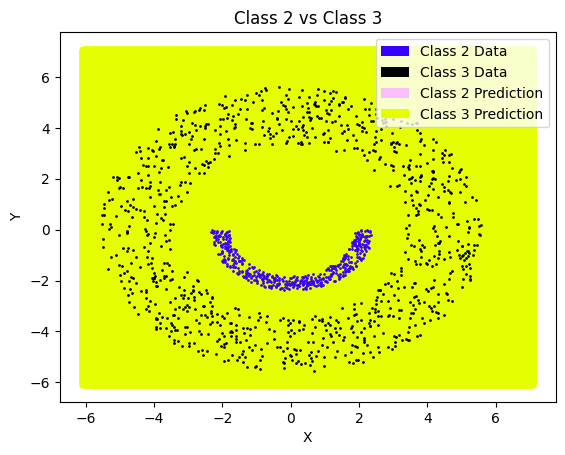

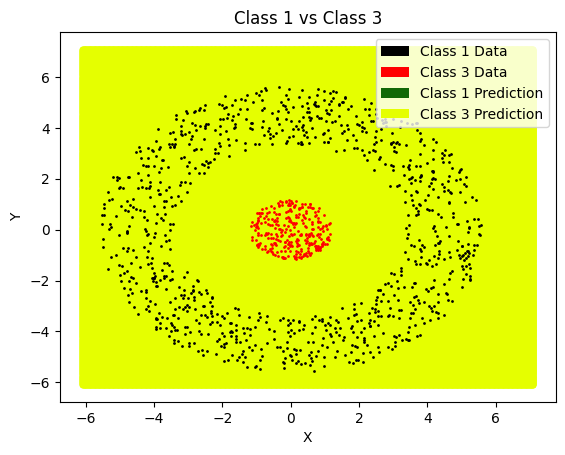

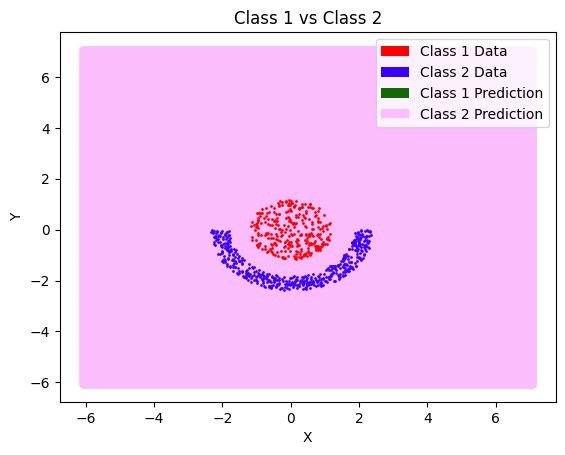

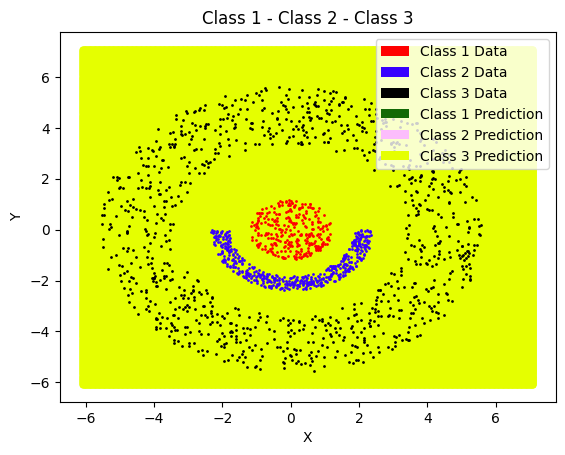

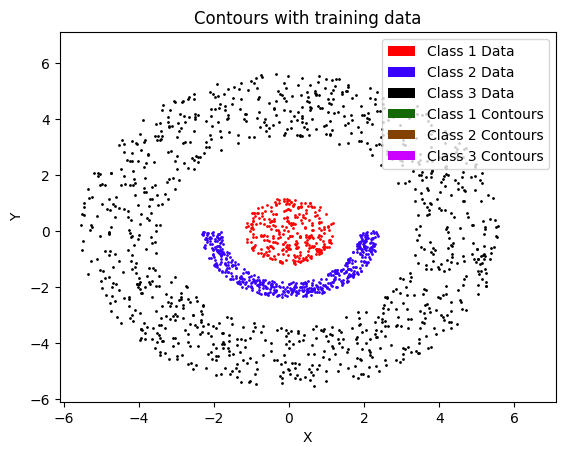

In [8]:
#Classifier - 1
covMatrixCfier1 = np.zeros((numFeature, numFeature))

for i in range(nClass):
	for j in range(numFeature):
		for k in range(numFeature):
			if j!=k:
				covMatrixCfier1[j, k] = 0
			else:
				covMatrixCfier1[j, k] += covMatrix[i, j, k]

covMatrixCfier1 /= nClass

avgDiag = 0

for j in range(numFeature):
	for k in range(numFeature):
		if j==k:
			avgDiag += covMatrixCfier1[j, k]

avgDiag /= numFeature

for i in range(numFeature):
	for j in range(numFeature):
		if i==j:
			covMatrixCfier1[i,j] = avgDiag

temp = np.copy(covMatrixCfier1)
covMatrixCfier1 = np.copy(covMatrix)

for i in range(nClass):
	covMatrixCfier1[i] = temp
##end of Classifier - 1

#Classifier - 2
covMatrixCfier2 = np.zeros((numFeature, numFeature))

for i in range(nClass):
	for j in range(numFeature):
		for k in range(numFeature):
			covMatrixCfier2[j, k] += covMatrix[i, j, k]

covMatrixCfier2 /= nClass

temp = np.copy(covMatrixCfier2)
covMatrixCfier2 = np.copy(covMatrix)

for i in range(nClass):
	covMatrixCfier2[i] = temp

## end classifier-2

#Classifier - 3
covMatrixCfier3 = np.copy(covMatrix)

for i in range(nClass):
	for j in range(numFeature):
		for k in range(numFeature):
			if j!=k:
				covMatrixCfier3[i, j, k] = 0

##end of classifier - 3

#for classifier - 4, use original matrix covMatrix


testSample = np.zeros((nClass))

for i in range(nClass):
	testSample[i] = len(testList[i])

#classifier - 1
predictClassClf1 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrixCfier1[k])
		predictClassClf1[i][np.argmax(discValue)] += 1

#end -- classifier - 1

#classifier - 2
predictClassClf2 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrixCfier2[k])
		predictClassClf2[i][np.argmax(discValue)] += 1

#end -- classifier - - 2

#classifier - 3
predictClassClf3 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrixCfier3[k])
		predictClassClf3[i][np.argmax(discValue)] += 1
#end Classifier-3

#classifier - 4
predictClassClf4 = np.zeros((nClass,nClass))

for i in range(nClass):
	for j in range(int(testSample[i])):
		discValue = np.zeros(nClass)
		for k in range(nClass):
			discValue[k] = discriminant(testList[i][j],meanVector[k],covMatrix[k])
		predictClassClf4[i][np.argmax(discValue)] += 1

#end -- Classifier - 4
plot(covMatrixCfier1, "class1_")
plot(covMatrixCfier2, "class2_")
plot(covMatrixCfier3, "class3_")
plot(covMatrix, "class4_")
